 # О Чем Проект?


Выбранный набор данных называется "Neftflix IMDB Scores", и содержит в себе подробную информацию о фильмах и сериалах на стриминговой платформе Netflix и фокусируется на соответсвующие оценки и голоса на сайте IMDb.

(Ссылка: www.kaggle.com/datasets/thedevastator/netflix-imdb-scores).

Благодаря этому набору данных, можно узнать как распределяются оценки на те или иные фильмы.

**Цели этого проекта:**
- Найти главные факторы делающие фильмы и сериалы популярными среди многочисленных зрителей.
- Определить лучшие фильмы и сериалы для каждой возрастной категории.
- Проанализировать как оценки фильмов и сериалов на сайте IMDb изменялись сквозь время.

# Обзор Набора Данных

In [37]:
import pandas as pd
src = pd.read_csv('netflix_imdb.csv')
src.shape

(5283, 11)

Набор данных имеет 11 столбов и 5283 строк.

In [38]:
src.columns

Index(['index', 'id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'imdb_id', 'imdb_score', 'imdb_votes'],
      dtype='object')

In [39]:
src.dtypes

index                  int64
id                    object
title                 object
type                  object
description           object
release_year           int64
age_certification     object
runtime                int64
imdb_id               object
imdb_score           float64
imdb_votes           float64
dtype: object

Набор данных имеет 11 столбцов:
(число - integer или float, объект - может содержать строки, смешанные строки и не-строки)

**index** - число, номер ряда в наборе данных.

**id** - объект, идентификационный номер фильма/сериала.

**title** - объект, название фильма/сериала.

**type** - объект, столбец показывающий фильм это или сериал.

**description** - объект, аннотация фильма/сериала.

**release year** - число, год выхода фильма/сериала.

**age_certification** - объект, возрастной рейтинг фильма/сериала.

**runtime** - число, длительность фильма/сериала.

**imdb_id** - объект, идентификационный номер фильма/сериала в базе данных IMDb.

**imdb_score** - число, оценка фильма/сериала в базе данных IMDb.

**imdb_votes** - число, количество проголосовавших пользователь сайта IMDb.


In [40]:
src.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

Пропущенные значения:

Описание - 5

Возрастной Рейтинг - 2285

Голоса IMDb - 16

# Исследовательские вопросы

**1)** Как изменялись средние оценки контента на Netflix сквозь время?

**2)** Насколько большая разница между рейтингами лучших фильмов и сериалов на Netflix?

**3)** Может ли длительность картины влиять на оценку?

**4)** Как ежегодно менялось количество контента выпускаемого на Netflix?

**5)** Каким образом распределились голоса зрителей если опираться на возрастной рейтинг картин?

# Подготовка Данных

In [41]:
# Насколько мы знаем, в наборе данных имеются пропущенные значения, которые могут помешать объективному анализу данных, поэтому надо их очистить.
# Еще раз просмотрим статистику пропущенных данных
src.isnull().sum()

index                   0
id                      0
title                   0
type                    0
description             5
release_year            0
age_certification    2285
runtime                 0
imdb_id                 0
imdb_score              0
imdb_votes             16
dtype: int64

In [42]:
# Очищаем пропущенные значения столбцов description и imdb_votes и создаем новый набор данных с названием prep_data
# Но не удаляем пропущенные значения столбца age_certification, потому что так мы потеряем очень большое количество данных
prep_data = src.dropna( subset=['description', 'imdb_votes'])

# Также, создаем отдельный набор данных где удаляем все пропущенные значения, чтобы использовать его в вопросе с возрастной категорией
prep_data_specific = src.dropna()

In [43]:
# Также, столбцы id, description и imdb_id могут быть удалены, так как они не помогут в проведении анализа и лишь служат как идентификаторы в базе данных.
prep_data = prep_data.drop(columns=['id', 'description', 'imdb_id'], errors = 'ignore')
prep_data.head()

,index,title,type,release_year,age_certification,runtime,imdb_score,imdb_votes
0,0,Taxi Driver,MOVIE,1976,R,113,8.3,795222.0
1,1,Monty Python and the Holy Grail,MOVIE,1975,PG,91,8.2,530877.0
2,2,Life of Brian,MOVIE,1979,R,94,8.0,392419.0
3,3,The Exorcist,MOVIE,1973,R,133,8.1,391942.0
4,4,Monty Python's Flying Circus,SHOW,1969,TV-14,30,8.8,72895.0


# Анализ и Визуализация данных

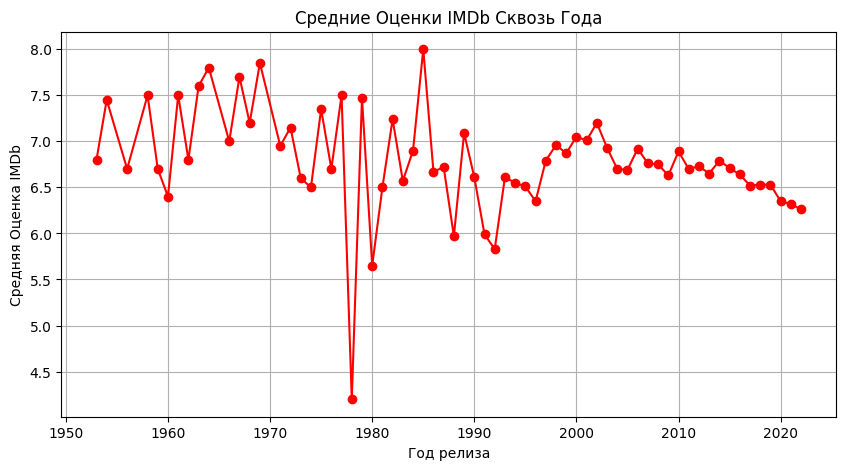

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1 вопрос

annual_score = round( prep_data.groupby(by='release_year').imdb_score.mean(), 2)
'''
annual_score = ежегодный рейтинг
round(x,2) = округляет значение x до двух цифр после нуля
prep_data.groupby() = группирует значения определенного атрибута, в данном контексте "release year"
imdb_score.mean() = среднее значение атрибута imdb_score
'''

plt.figure(figsize=(10, 5)) #определяем размер графика в дюймах
plt.plot(annual_score.index, annual_score.values, marker='o', color='r') #рисуем график
plt.title('Средние Оценки IMDb Сквозь Года') #название графика
plt.xlabel('Год релиза') # название оси X
plt.ylabel('Средняя Оценка IMDb') # название оси Y
plt.grid(True) # показывает сетку
plt.show() # показывает график

In [45]:
# 2 вопрос
movie_rate = round(prep_data[prep_data.type == 'MOVIE'].imdb_score.mean(), 2)
best_movie = prep_data.loc[prep_data[prep_data.type == 'MOVIE'].imdb_score.idxmax()]
'''
round(x,2) = округляет значение x до двух цифр после нуля
prep_data[prep_data.type == "MOVIE"] = возвращает Series в которых значение type равно "MOVIE"
imdb_score.mean() = среднее значение атрибута imdb_score
prep_data.loc() = возвращает Series согласно данному индексу
imdb_score.idxmax() = возвращает индекс Series, у которого значение imdb_score равно максимуму
'''

show_rate = round(prep_data[prep_data.type == 'SHOW'].imdb_score.mean(), 2)
best_show = prep_data.loc[prep_data[prep_data.type == 'SHOW'].imdb_score.idxmax()]

'''
round(x,2) = округляет значение x до двух цифр после нуля
prep_data[prep_data.type == "SHOW"] = возвращает Series в которых значение type равно "SHOW"
imdb_score.mean() = среднее значение атрибута imdb_score
prep_data.loc() = возвращает Series согласно данному индексу
imdb_score.idxmax() = возвращает индекс Series, у которого значение imdb_score равно максимуму

'''

# f(formatted) string - используется для комбинирования строк и значения переменных
print(f'Лучший фильм - {best_movie.title}, {best_movie.release_year} года, с рейтингом - {best_movie.imdb_score} и с количеством голосов - {round(best_movie.imdb_votes)}.')
print(f'Лучший сериал - {best_show.title}, {best_show.release_year} года, с рейтингом - {best_show.imdb_score} и с количеством голосов - {round(best_show.imdb_votes)}.\n')

# выводит определенный текст в зависимости от значений переменных movie_rate и show_rate
if(movie_rate > show_rate):
  print(f'Сериалы имеют средний рейтинг IMDb со значением = {show_rate}')
  print(f'Фильмы имеют более высокий средний рейтинг IMDb со значением = {movie_rate}')
elif(show_rate > movie_rate):
  print(f'Фильмы имеют средний рейтинг IMDb со значением = {movie_rate}')
  print(f'Сериалы имеют более высокий средний рейтинг IMDb со значением = {show_rate}')
else:
  print(f'Обе категории имеют одинаковый средний рейтинг IMDb со значением = {movie_rate}')

Лучший фильм - No Longer Kids, 1979 года, с рейтингом - 9.0 и с количеством голосов - 943.
Лучший сериал - Khawatir, 2005 года, с рейтингом - 9.6 и с количеством голосов - 3046.

Фильмы имеют средний рейтинг IMDb со значением = 6.27
Сериалы имеют более высокий средний рейтинг IMDb со значением = 7.02


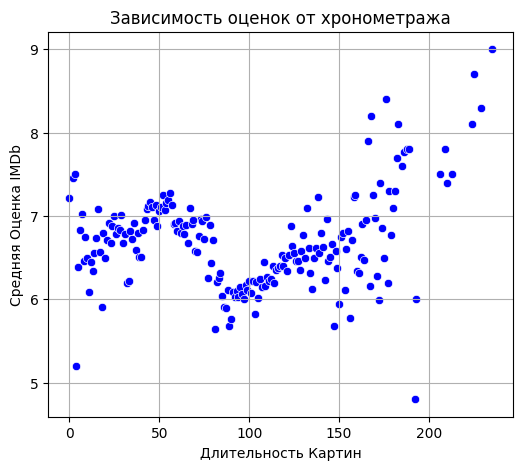

In [46]:
# 3 вопрос

runtime_rate= round( prep_data.groupby(by='runtime').imdb_score.mean(), 2)
'''
runtime_rate = длительность картины
round(x,2) = округляет значение x до двух цифр после нуля
prep_data.groupby() = группирует значения определенного атрибута, в данном контексте "runtime"
imdb_score.mean() = среднее значение атрибута imdb_score
'''

plt.figure(figsize=(6, 5)) #определяем размер графика в дюймах
sns.scatterplot(x=runtime_rate.index, y=runtime_rate.values, color='b') #рисуем точки
plt.title('Зависимость оценок от хронометража') #название графика
plt.xlabel('Длительность Картин') # название оси X
plt.ylabel('Средняя Оценка IMDb') # название оси Y
plt.grid(True) # показывает сетку
plt.show() # показывает график


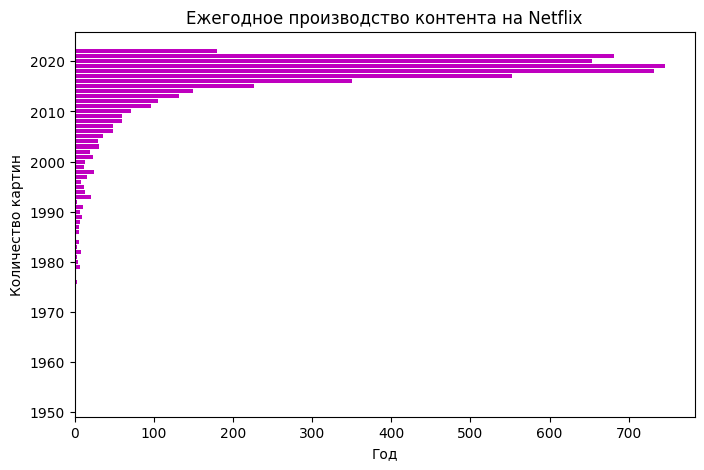

In [47]:
# 4 вопрос
production_rate = prep_data.groupby(by='release_year').title.count()
'''
production_rate = производство контента
prep_data.groupby() = группирует значения определенного атрибута, в данном контексте "release_year"
title.count() = считает количество элементов атрибута "title"
'''

plt.figure(figsize=(8, 5)) #определяем размер графика в дюймах
plt.barh(production_rate.index, production_rate.values, color='m') #рисуем гистограмму
plt.title('Ежегодное производство контента на Netflix') #название графика
plt.xlabel('Год') # название оси X
plt.ylabel('Количество картин') # название оси Y
plt.show() # показывает график

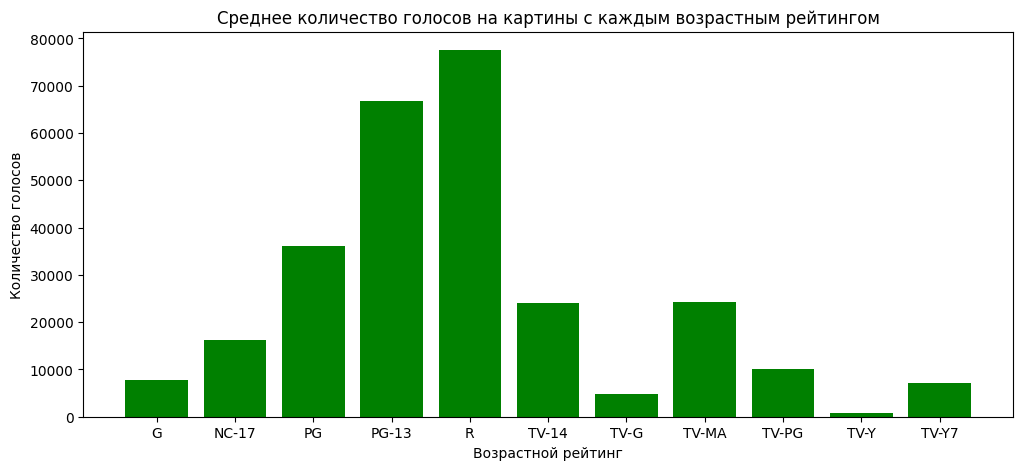

In [48]:
# 5 вопрос

age_rate = prep_data_specific.groupby(by='age_certification').imdb_votes.mean()
'''
age_rate = возрастной рейтинг
prep_data.groupby() = группирует значения определенного атрибута, в данном контексте "age_certification"
imdb_votes.mean() = среднее значение атрибута imdb_votes
'''

plt.figure(figsize=(12, 5)) #определяем размер графика в дюймах
plt.bar(age_rate.index, age_rate.values, color='g') #рисуем гистограмму
plt.title('Среднее количество голосов на картины с каждым возрастным рейтингом') #название графика
plt.xlabel('Возрастной рейтинг') # название оси X
plt.ylabel('Количество голосов') # название оси Y
plt.show() # показывает график


# Заключение


( Все фильмы и сериалы оцениваются по 10-бальной шкале на сайте IMDb. Рейтинг сопоставляется из голосов обычных пользователей и является средним показателем всех оценок. )

1) Можно заметить невооруженным глазом, что худшие оценки получали фильмы и сериалы, которые были произведены  в 1978 году со средним баллом меньше 4.
В 1985 году, напротив, на свет вышли картины с лучшими оценками в среднем получая ровно 8 баллов.
В целом, фильмы и сериалы XX века стабильно получали высокие баллы по сравнению с картинами XXI века, которые идут на спад в последние годы.

2) Лучшим фильмом на сервисе Netflix оказался “No Longer Kids” с рейтингом 9.0, за который проголосовали 943 пользователя.
По сравнению с ним, сериал “Khawatir” получил на 0.6 балла больше, в итоге оказываясь на первом месте с 9.6 баллами и голосами более 3000 пользователей.
Средний рейтинг всех фильмов - 6.27, Средний рейтинг всех сериалов - 7.02.
Из этого можно сделать вывод, что пользователи Netflix и IMDb больше предпочитают сериалы, чем фильмы.

3) Легко заметить что длительность большинства контента колеблется около 100 минут, что и не удивительно, так как большинство фильмов имеет средний хронометраж от полутора часов до двух. Такие фильмы были оценены в среднем от 5.6 до 7.2.
Интересно, что наихудший рейтинг (4.5) принадлежит фильму протяжностью около 190 минут, а носитель наилучшего рейтинга (9.0) - это фильм с длительностью более 250 минут.
В целом, зрители ставили высокий балл фильмам с хронометражем от 160 минут до 185 минут, то есть 2.5-3 часовым фильмам, например: “Темный Рыцарь”, “Зеленая миля”, “Властелин Колец” и т.п.
Также, хороший балл имеют картины с длительностью около 50 минут, что является типичным хронометражем для многих популярных сериалов, такие как “Во все тяжкие”, “Игра Престолов” и т.п.

4) Как можно увидеть на графике, от начала 1950-х до конца 1980-х Netflix не совершенно не производил никакого контента. Это имеет простое объяснение, так как Netflix был основан в 1990-х. Время спустя, количество контента на стримингом сервисе начал постепенно расти, пока не достиг своего пика в 2019-2020 годах, после чего, резко убавил обороты. Это вероятно связано с появлением Covid-19 и всемирной пандемией. А так, можно увидеть, что на пиковом моменте Netflix умудрялся создавать более 700 фильмов и сериалов для зрителей.

5) Как видно на графике, самые популярные жанры кино - это PG(до 15 с родителями), PG-13(старше 13), R(до 17 с родителями).
При этом, контент с рейтингом R ушел далеко вперед со средним количеством голосов составляющий почти 80000, это говорит о популярности более взрослых фильмов и сериалов, и соответственно более взрослой аудитории.
Самое наименьшее количество голосов имеет жанр TV-Y(для всех детей), вероятно потому, что такие фильмы не пользуются интересом взрослой аудитории и не так распространены.

Заключительно, можно сделать вывод что большинству зрителей могут понравится сериалы с возрастным рейтингом R(для взрослых), с длительностью эпизода около 40-50 минут или же фильмы с тем же рейтингом и хронометражем около 2.5-3 часов.